In [1]:
import numpy as np
import plotly.graph_objects as go

from binary.checking.two_sample.simulation import simulation_sprt
from binary.checking.two_sample_sequential_sample_size import sequential_sample_size, max_sequential_sample_size
from binary.checking.tools import duration_conf_interval, table_show

# Правосторонняя альтернатива

## Моделирование длительности последовательного теста в частных случаях

In [2]:
alternative = "greater"
alpha = 0.05
beta = 0.2

iter_size = 50_000
batch_size = 10_000
p0_list = [0.01, 0.5]
lift_list = [0.05, 0.2]
p_cnt = 15

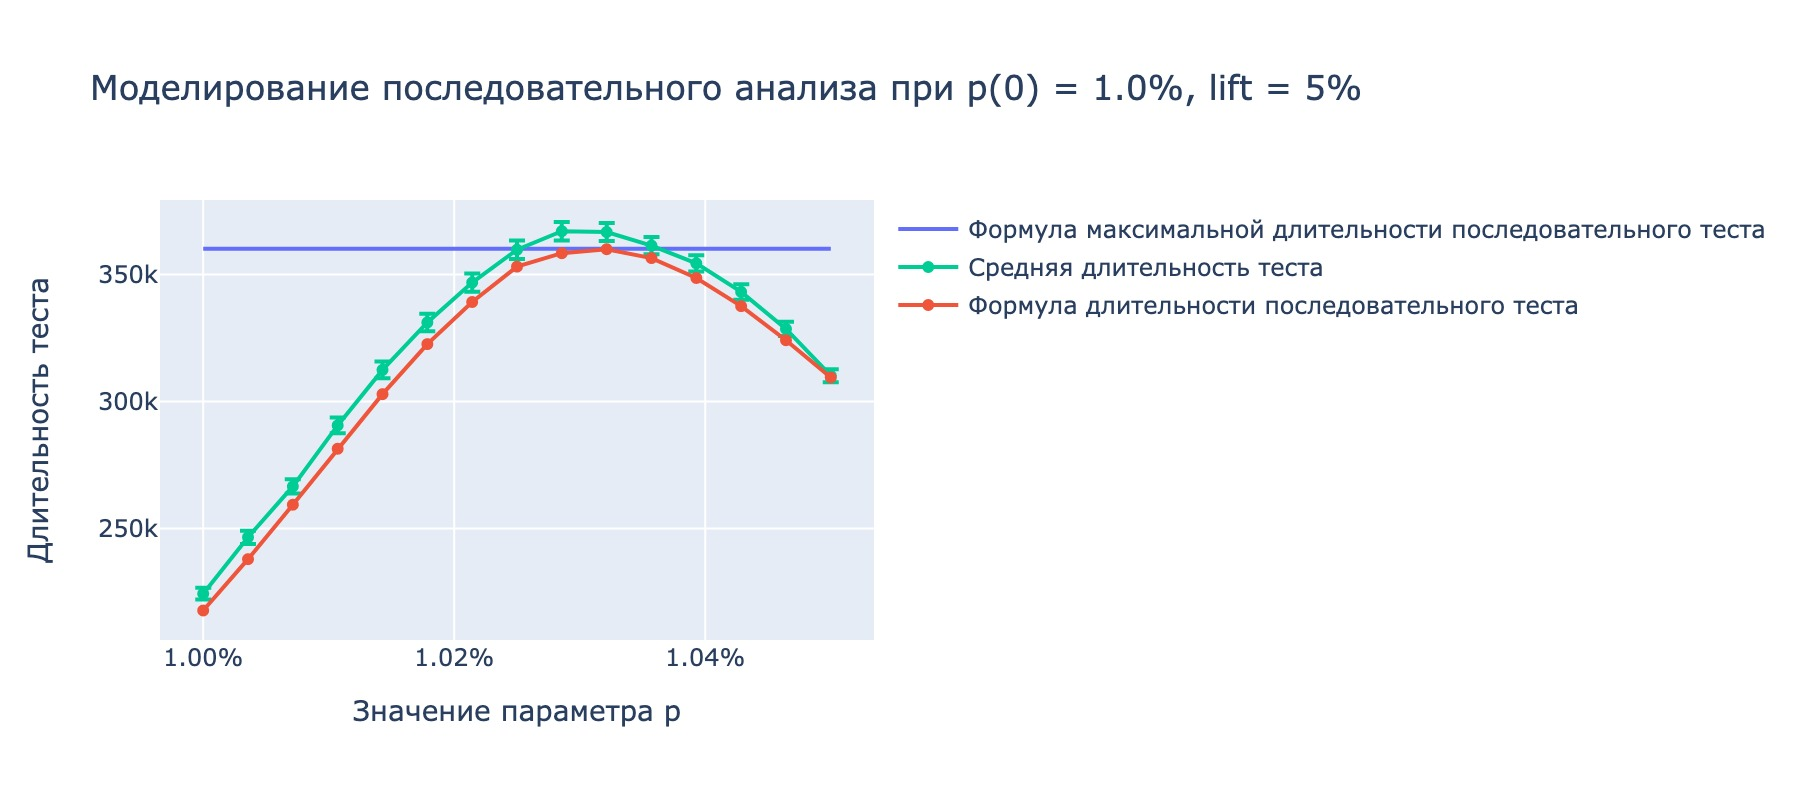

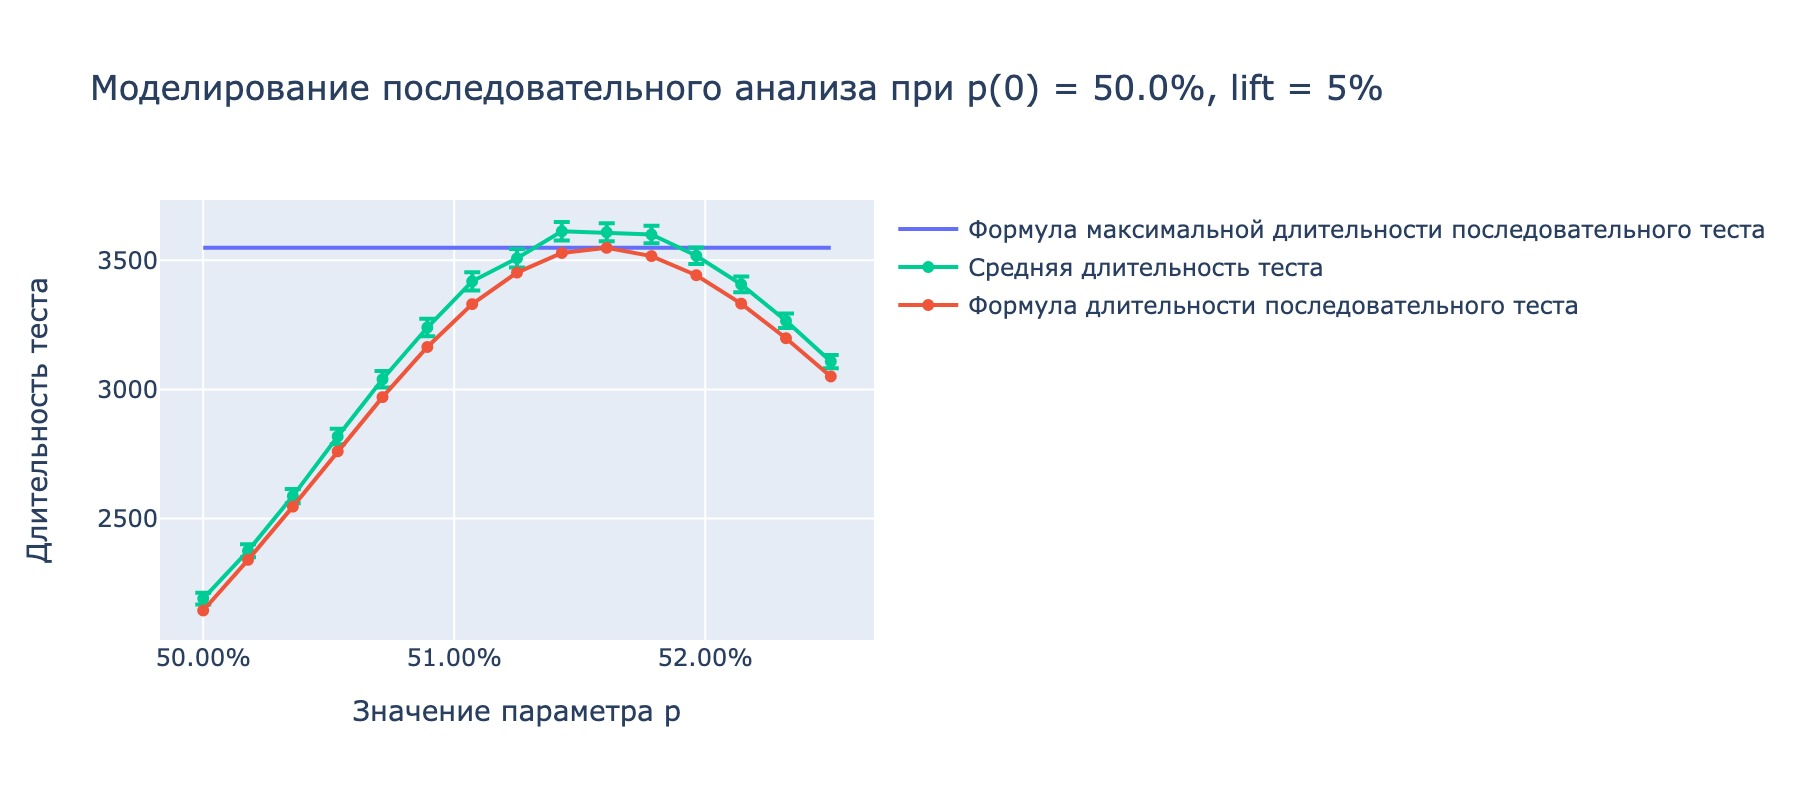

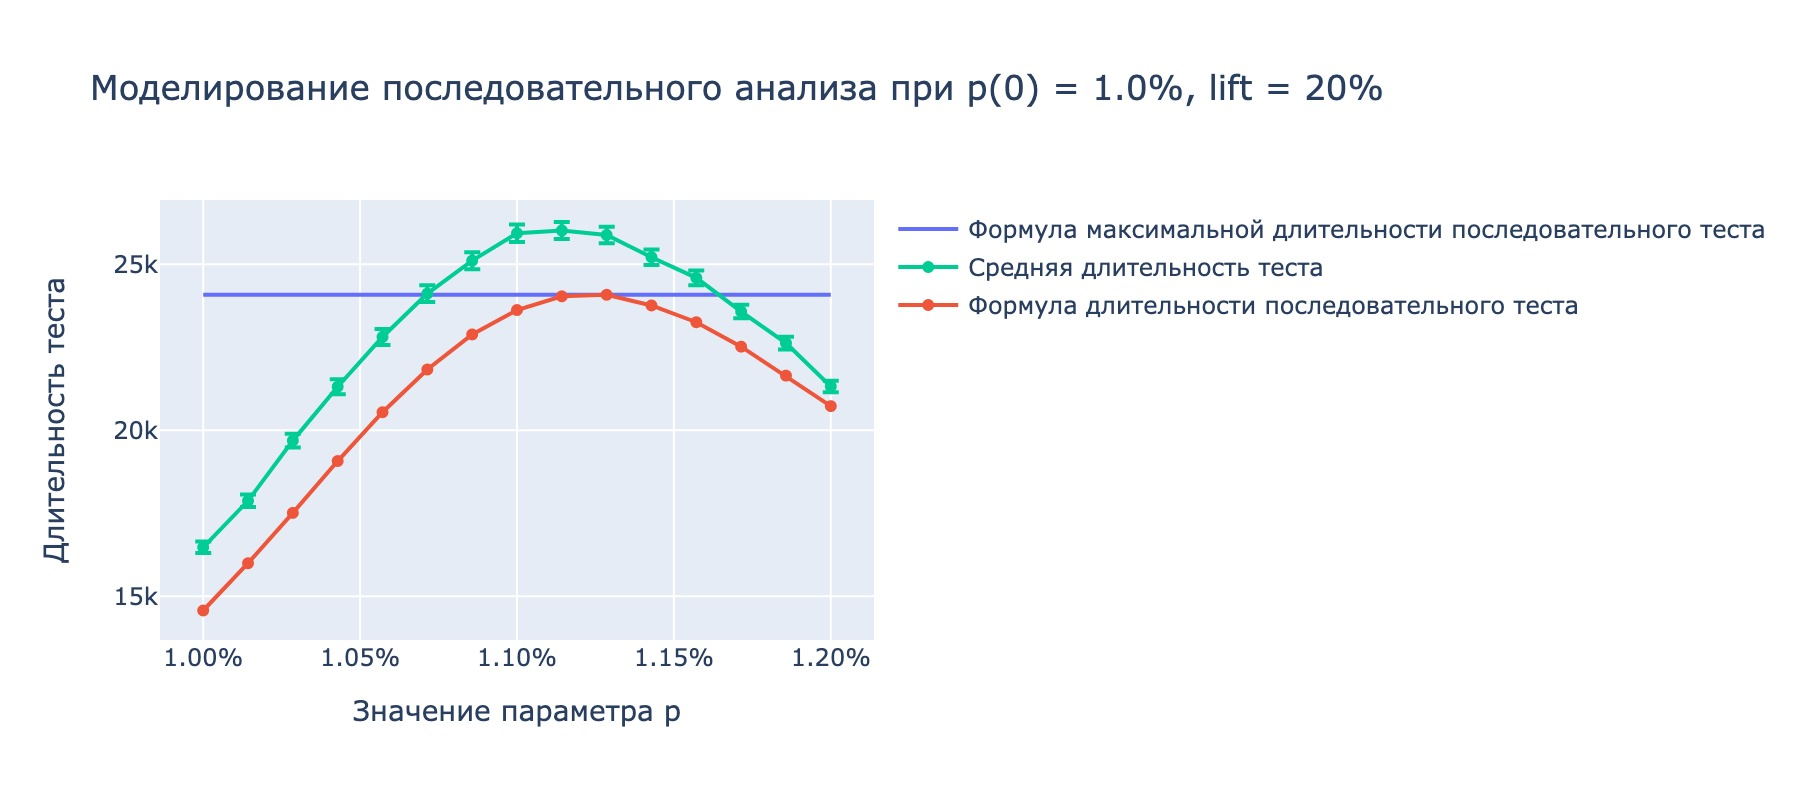

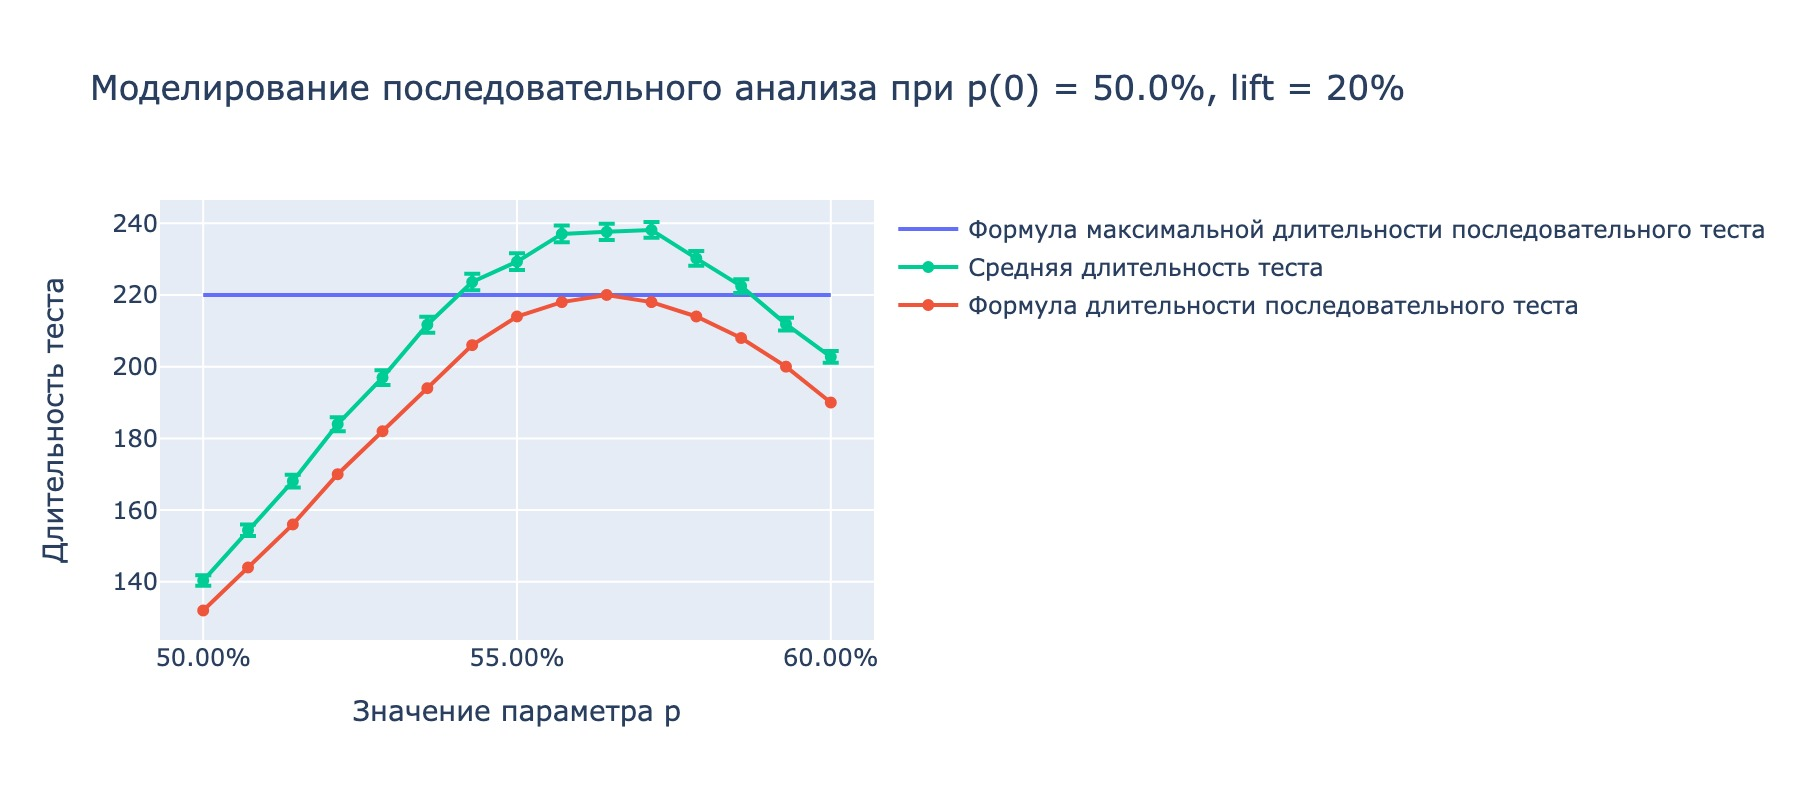

In [3]:
for lift in lift_list:
    for p0 in p0_list:
        d = p0 * lift
        p_list = np.linspace(start=p0, stop=p0+d, num=p_cnt)
        max_sequential_duration = max_sequential_sample_size(p0, d, alpha, beta, alternative)[0]
        
        duration_matrix = []
        mean_duration_list = []
        sequential_duration_list = []
        
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=p_list,
                                 y=max_sequential_duration * np.ones(len(p_list)),
                                 mode="lines",
                                 line={"color": "#636EFA"},
                                 name="Формула максимальной длительности последовательного теста"))
        
        for p in p_list:
            res = simulation_sprt(p, p0, iter_size, batch_size, 
                                  p0, d, alpha, beta, alternative)
            duration_list = res["duration"]
            
            duration_matrix.append(duration_list)
            mean_duration_list.append(np.mean(duration_list))
            
            sequential_duration = sequential_sample_size(p, p0, d, alpha, beta, alternative)[0]
            sequential_duration_list.append(sequential_duration)
    
        left_side_list, right_side_list = duration_conf_interval(duration_matrix)
        
        fig.add_trace(go.Scatter(x=p_list,
                                 y=mean_duration_list,
                                 mode="markers+lines",
                                 line={"color": "#00CC96"},
                                 name="Средняя длительность теста",
                                 error_y={
                                     "type": "data",
                                     "symmetric": False,
                                     "arrayminus": left_side_list,
                                     "array": right_side_list
                                 }))
        fig.add_trace(go.Scatter(x=p_list,
                                 y=sequential_duration_list,
                                 mode="markers+lines",
                                 line={"color": "#EF553B"},
                                 name="Формула длительности последовательного теста"))

        fig.update_layout(title="Моделирование последовательного анализа при "
                                + f"p(0) = {p0:.1%}, lift = {lift:.0%}",
                          xaxis_title="Значение параметра p",
                          yaxis_title="Длительность теста",
                          xaxis_tickformat=".2%")
        fig.show(renderer="jpeg", width=900, height=400, scale=2)

## Статистика отношения рассчитанной длительности теста и средней длительности последовательного теста

In [4]:
alternative = "greater"
alpha = 0.05
beta = 0.2

iter_size = 50_000
batch_size = 10_000
p0_list = [0.01, 0.05, 0.1, 0.2, 0.5]
lift_list = [0.05, 0.1, 0.2, 0.5]
p_cnt = 15

In [ ]:
ratio_max_duration_matrix = []
ratio_hyp_duration_matrix = []
ratio_alter_duration_matrix = []

for lift in lift_list:
    ratio_max_duration_matrix.append([])
    ratio_hyp_duration_matrix.append([])
    ratio_alter_duration_matrix.append([])
    
    for p0 in p0_list:
        d = p0 * lift
        p_list = np.linspace(start=p0, stop=p0+d, num=p_cnt)
        
        duration_matrix = []
        diff_rel_duration_list = []
        
        for p in p_list:
            res = simulation_sprt(p, p0, iter_size, batch_size, 
                                  p0, d, alpha, beta, alternative)
            duration_list = res["duration"]
            
            duration_matrix.append(duration_list)
            
            mean_duration = np.mean(duration_list)
            sequential_duration = sequential_sample_size(p, p0, d, alpha, beta, alternative)[0]
            
            diff_rel_duration = np.abs(mean_duration - sequential_duration) \
                                / min(mean_duration, sequential_duration)
            
            diff_rel_duration_list.append(diff_rel_duration)
        
        max_diff_rel_duration = max(diff_rel_duration_list)
        ratio_max_duration_matrix[-1].append(max_diff_rel_duration)
        ratio_hyp_duration_matrix[-1].append(diff_rel_duration_list[0])
        ratio_alter_duration_matrix[-1].append(diff_rel_duration_list[-1])

for ratio_duration_matrix, sub_title in zip([ratio_max_duration_matrix,
                                             ratio_hyp_duration_matrix,
                                             ratio_alter_duration_matrix],
                                            ["в худшем случае",
                                             "при гипотезе",
                                             "при альтернативе"]):
    title = "Относительная ошибка расчёта длительность теста " + sub_title
    table_show(ratio_duration_matrix, p0_list, lift_list,
               title=title, abs_flg=False) \
              .show(renderer="jpeg", width=900, height=400, scale=2)

# Левосторонняя альтернатива

## Моделирование длительности последовательного теста в частных случаях

In [ ]:
alternative = "less"
alpha = 0.05
beta = 0.2

iter_size = 50_000
batch_size = 10_000
p0_list = [0.01, 0.5]
lift_list = [0.05, 0.2]
p_cnt = 15

In [ ]:
for lift in lift_list:
    for p0 in p0_list:
        d = p0 * lift
        p_list = np.linspace(start=p0-d, stop=p0, num=p_cnt)
        max_sequential_duration = max_sequential_sample_size(p0, d, alpha, beta, alternative)[0]
        
        duration_matrix = []
        mean_duration_list = []
        sequential_duration_list = []
        
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=p_list,
                                 y=max_sequential_duration * np.ones(len(p_list)),
                                 mode="lines",
                                 line={"color": "#636EFA"},
                                 name="Формула максимальной длительности последовательного теста"))
        
        for p in p_list:
            res = simulation_sprt(p, p0, iter_size, batch_size, 
                                  p0, d, alpha, beta, alternative)
            duration_list = res["duration"]
            
            duration_matrix.append(duration_list)
            mean_duration_list.append(np.mean(duration_list))
            
            sequential_duration = sequential_sample_size(p, p0, d, alpha, beta, alternative)[0]
            sequential_duration_list.append(sequential_duration)
    
        left_side_list, right_side_list = duration_conf_interval(duration_matrix)
        
        fig.add_trace(go.Scatter(x=p_list,
                                 y=mean_duration_list,
                                 mode="markers+lines",
                                 line={"color": "#00CC96"},
                                 name="Средняя длительность теста",
                                 error_y={
                                     "type": "data",
                                     "symmetric": False,
                                     "arrayminus": left_side_list,
                                     "array": right_side_list
                                 }))
        fig.add_trace(go.Scatter(x=p_list,
                                 y=sequential_duration_list,
                                 mode="markers+lines",
                                 line={"color": "#EF553B"},
                                 name="Формула длительности последовательного теста"))

        fig.update_layout(title="Моделирование последовательного анализа при "
                                + f"p(0) = {p0:.1%}, lift = {lift:.0%}",
                          xaxis_title="Значение параметра p",
                          yaxis_title="Длительность теста",
                          xaxis_tickformat=".2%")
        fig.show(renderer="jpeg", width=900, height=400, scale=2)

## Статистика отношения рассчитанной длительности теста и средней длительности последовательного теста

In [ ]:
alternative = "less"
alpha = 0.05
beta = 0.2

iter_size = 50_000
batch_size = 10_000
p0_list = [0.01, 0.05, 0.1, 0.2, 0.5]
lift_list = [0.05, 0.1, 0.2, 0.5]
p_cnt = 15

In [ ]:
ratio_max_duration_matrix = []
ratio_hyp_duration_matrix = []
ratio_alter_duration_matrix = []

for lift in lift_list:
    ratio_max_duration_matrix.append([])
    ratio_hyp_duration_matrix.append([])
    ratio_alter_duration_matrix.append([])
    
    for p0 in p0_list:
        d = p0 * lift
        p_list = np.linspace(start=p0-d, stop=p0, num=p_cnt)
        
        duration_matrix = []
        diff_rel_duration_list = []
        
        for p in p_list:
            res = simulation_sprt(p, p0, iter_size, batch_size, 
                                  p0, d, alpha, beta, alternative)
            duration_list = res["duration"]
            
            duration_matrix.append(duration_list)
            
            mean_duration = np.mean(duration_list)
            sequential_duration = sequential_sample_size(p, p0, d, alpha, beta, alternative)[0]
            
            diff_rel_duration = np.abs(mean_duration - sequential_duration) \
                                / min(mean_duration, sequential_duration)
            
            diff_rel_duration_list.append(diff_rel_duration)
        
        max_diff_rel_duration = max(diff_rel_duration_list)
        ratio_max_duration_matrix[-1].append(max_diff_rel_duration)
        ratio_hyp_duration_matrix[-1].append(diff_rel_duration_list[-1])
        ratio_alter_duration_matrix[-1].append(diff_rel_duration_list[0])

for ratio_duration_matrix, sub_title in zip([ratio_max_duration_matrix,
                                             ratio_hyp_duration_matrix,
                                             ratio_alter_duration_matrix],
                                            ["в худшем случае",
                                             "при гипотезе",
                                             "при альтернативе"]):
    title = "Относительная ошибка расчёта длительность теста " + sub_title
    table_show(ratio_duration_matrix, p0_list, lift_list,
               title=title, abs_flg=False) \
              .show(renderer="jpeg", width=900, height=400, scale=2)